### 🔹 Шаг 1: Загрузка и первичный анализ данных

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn (1).csv')
print(f"Количество строк: {df.shape[0]}. Количество столбцов: {df.shape[1]}")
df.head()

Количество строк: 7043. Количество столбцов: 21


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### 🔹 Шаг 2: Проверка данных на пропуски и типы данных

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
for column in df.columns:
    print(df[column].value_counts())
    print("------------------------------")

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
------------------------------
gender
Male      3555
Female    3488
Name: count, dtype: int64
------------------------------
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
------------------------------
Partner
No     3641
Yes    3402
Name: count, dtype: int64
------------------------------
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
------------------------------
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
------------------------------
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
------------------------------
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: c

In [7]:
# Так как у меня нету таргета я на основе имеющихся данных создам таргет
import numpy as np

conditions = [
    (df['MonthlyCharges'] > 100) & (df['InternetService'] == 'Fiber optic') & (df['Churn'] == 'No'),
    (df['MonthlyCharges'] <= 100) & (df['InternetService'] == 'DSL'),
    (df['MonthlyCharges'] < 50)
]

values = ['High', 'Medium', 'Low']

df['ideal_plan'] = np.select(conditions, values, default='Medium')

# Удаляю эти признаки так как они могут привести к утечку данных, но удалил customerId так как он является id
df.drop(columns=['customerID', 'MonthlyCharges', 'InternetService', 'Churn', 'TotalCharges'], inplace=True)

In [8]:
df['ideal_plan'].value_counts()

ideal_plan
Medium    4868
Low       1526
High       649
Name: count, dtype: int64

In [9]:
df['ideal_plan'] = df['ideal_plan'].map({'Low': 0, 'Medium': 1, 'High': 2})

### 🔹 Шаг 3: Разделение данных на train и test

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop('ideal_plan', axis=1)
y = df.ideal_plan

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(7043, 16)
(7043,)


In [11]:
y_train.describe()

count    5634.000000
mean        0.875044
std         0.538922
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: ideal_plan, dtype: float64

In [12]:
y_test.describe()

count    1409.000000
mean        0.877218
std         0.552473
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: ideal_plan, dtype: float64

### 🔹 Шаг 4: Масштабирование признаков

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = X.select_dtypes(include='number').columns

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train_scaled[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test_scaled[numeric_cols])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

numeric_columns = pd.concat([X_train_scaled, X_test_scaled])

In [14]:
df.describe()

,SeniorCitizen,tenure,ideal_plan
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,0.875479
std,0.368612,24.559481,0.541621
min,0.000000,0.000000,0.000000
25%,0.000000,9.000000,1.000000
50%,0.000000,29.000000,1.000000
75%,0.000000,55.000000,1.000000
max,1.000000,72.000000,2.000000


In [15]:
numeric_columns.describe()

,SeniorCitizen,tenure
count,7043.000000,7043.000000
mean,0.003641,-0.000080
std,1.003421,1.005614
min,-0.437749,-1.325551
25%,-0.437749,-0.957036
50%,-0.437749,-0.138115
75%,-0.437749,0.926483
max,2.284413,1.622566


### 🔹 Шаг 5: Кодирование категориальных признаков

In [16]:
import category_encoders as ce

categorical_features = X.select_dtypes(include='object').columns
cat_transformer_tme = ce.TargetEncoder(cols=categorical_features)

X_train_scaled[categorical_features] = cat_transformer_tme.fit_transform(X_train_scaled[categorical_features], y_train)
X_test_scaled[categorical_features] = cat_transformer_tme.transform(X_test_scaled[categorical_features])

### 🔹 Шаг 6: Построение Baseline модели и оценка ее качество

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

baseline = KNeighborsClassifier(n_neighbors=3)
baseline.fit(X_train_scaled, y_train)

y_pred_baseline_train = baseline.predict(X_train_scaled)
y_pred_baseline_test = baseline.predict(X_test_scaled)

accuracy_train = accuracy_score(y_train, y_pred_baseline_train)
accuracy_test = accuracy_score(y_test, y_pred_baseline_test)

print(accuracy_train)
print(accuracy_test)

0.9513667021654242
0.8914123491838183


In [19]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(baseline, X_train_scaled, y_train, cv=5)  

print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.91836735 0.91304348 0.90417036 0.90505768 0.90674956]
Average cross-validation score: 0.9094776840383231


##### Я думал что accuracy на обучающих и тестовых данных показывает переобучение модели, а кросс валидация показала что модель хорошо обобщается на разных подвыборках данных

### 🔹 Шаг 7: Построение более сложных моделей

In [20]:
# Logistic Regression (L2 регуляризация)
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=565, multi_class='ovr', penalty='elasticnet', solver='saga', l1_ratio=0.5)
log_reg.fit(X_train_scaled, y_train)
y_proba_lg_train = log_reg.predict_proba(X_train_scaled)
y_proba_lg_test = log_reg.predict_proba(X_test_scaled)

# DecisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier

d_tree = DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=5)
d_tree.fit(X_train_scaled, y_train)
y_proba_dtree_train = d_tree.predict_proba(X_train_scaled)
y_proba_dtree_test = d_tree.predict_proba(X_test_scaled)

# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

r_forest = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)
r_forest.fit(X_train_scaled, y_train)
y_proba_rf_train = r_forest.predict_proba(X_train_scaled)
y_proba_rf_test = r_forest.predict_proba(X_test_scaled)

# CatBoostClassifier
from catboost import CatBoostClassifier

catboost = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.03, l2_leaf_reg=10, verbose=100)
catboost.fit(X_train_scaled, y_train)
y_proba_catboost_train = catboost.predict_proba(X_train_scaled)
y_proba_catboost_test = catboost.predict_proba(X_test_scaled)

C:\Users\MSI Cyborg\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


0:	learn: 1.0555322	total: 144ms	remaining: 1m 11s
100:	learn: 0.2053569	total: 639ms	remaining: 2.52s
200:	learn: 0.1566334	total: 1.17s	remaining: 1.74s
300:	learn: 0.1433812	total: 1.75s	remaining: 1.16s
400:	learn: 0.1356686	total: 2.3s	remaining: 568ms
499:	learn: 0.1296482	total: 2.86s	remaining: 0us


In [21]:
from sklearn.metrics import roc_auc_score

auc_lg_train = roc_auc_score(y_train, y_proba_lg_train, multi_class='ovr', average='macro')
auc_lg_test = roc_auc_score(y_test, y_proba_lg_test, multi_class='ovr', average='macro')

auc_dtree_train = roc_auc_score(y_train, y_proba_dtree_train, multi_class='ovr', average='macro')
auc_dtree_test = roc_auc_score(y_test, y_proba_dtree_test, multi_class='ovr', average='macro')

auc_rf_train = roc_auc_score(y_train, y_proba_rf_train, multi_class='ovr', average='macro')
auc_rf_test = roc_auc_score(y_test, y_proba_rf_test, multi_class='ovr', average='macro')

auc_catboost_train = roc_auc_score(y_train, y_proba_catboost_train, multi_class='ovr', average='macro')
auc_catboost_test = roc_auc_score(y_test, y_proba_catboost_test, multi_class='ovr', average='macro')

df = pd.DataFrame({
    "Models" : ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'CatBoostClassifier'],
    'Train Data' : [auc_lg_train, auc_dtree_train, auc_rf_train, auc_catboost_train], 
    'Test Data' : [auc_lg_test, auc_dtree_test, auc_rf_test, auc_catboost_test]
})

df

,Models,Train Data,Test Data
0,LogisticRegression,0.973986,0.975541
1,DecisionTreeClassifier,0.944672,0.942720
2,RandomForestClassifier,0.987613,0.979156
3,CatBoostClassifier,0.986259,0.980308


### 🔹 Шаг 8: Работа с лучшим моделем

In [29]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

# Применил PCA чтобы уменьшить размерность признаков
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

X_train_pca_df = pd.DataFrame(X_train_pca)
X_test_pca_df = pd.DataFrame(X_test_pca)

X_train_pca_df.columns = [f'PC{i+1}' for i in range(X_train_pca_df.shape[1])]
X_test_pca_df.columns = [f'PC{i+1}' for i in range(X_test_pca_df.shape[1])]

param_grid = {
    'iterations': [200, 300],
    'depth': [6, 8, 10],  
    'learning_rate': [0.05, 0.1], 
    'l2_leaf_reg': [1, 3] 
}

catboost = CatBoostClassifier(verbose=0, early_stopping_rounds=50)  

grid_search = GridSearchCV(catboost, param_grid, cv=3, scoring='accuracy', n_jobs=-1)  
grid_search.fit(X_train_pca, y_train)

best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)

best_catboost = CatBoostClassifier(**best_params, verbose=100, early_stopping_rounds=50)
best_catboost.fit(X_train_pca, y_train)

y_pred_train = best_catboost.predict(X_train_pca)
y_pred_test = best_catboost.predict(X_test_pca)

Лучшие параметры: {'depth': 6, 'iterations': 200, 'l2_leaf_reg': 3, 'learning_rate': 0.05}
0:	learn: 1.0231043	total: 16.3ms	remaining: 3.25s
100:	learn: 0.1899832	total: 1.39s	remaining: 1.36s
199:	learn: 0.1675564	total: 2.73s	remaining: 0us


In [34]:
accuracy_train_bm = accuracy_score(y_train, y_pred_train)
accuracy_test_bm = accuracy_score(y_test, y_pred_test)

print(f"Accuracy для обучающих данных: {accuracy_train_bm}")
print(f"Accuracy для тестовых данных: {accuracy_test_bm}")

Accuracy для обучающих данных: 0.9235001774937878
Accuracy для тестовых данных: 0.9027679205110007


In [37]:
# Без снижение размерности данных

param_grid = {
    'iterations': [200, 300],
    'depth': [6, 8, 10],  
    'learning_rate': [0.05, 0.1], 
    'l2_leaf_reg': [1, 3] 
}

catboost = CatBoostClassifier(verbose=0, early_stopping_rounds=50)  

grid_search = GridSearchCV(catboost, param_grid, cv=3, scoring='accuracy', n_jobs=-1)  
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)

best_catboost = CatBoostClassifier(**best_params, verbose=100, early_stopping_rounds=50)
best_catboost.fit(X_train_scaled, y_train)

y_pred_train = best_catboost.predict(X_train_scaled)
y_pred_test = best_catboost.predict(X_test_scaled)

accuracy_train_bm = accuracy_score(y_train, y_pred_train)
accuracy_test_bm = accuracy_score(y_test, y_pred_test)

print(f"Accuracy для обучающих данных: {accuracy_train_bm}")
print(f"Accuracy для тестовых данных: {accuracy_test_bm}")

Лучшие параметры: {'depth': 6, 'iterations': 200, 'l2_leaf_reg': 3, 'learning_rate': 0.05}
0:	learn: 1.0217266	total: 10.9ms	remaining: 2.18s
100:	learn: 0.1530162	total: 1.04s	remaining: 1.02s
199:	learn: 0.1292117	total: 2.08s	remaining: 0us
Accuracy для обучающих данных: 0.9382321618743344
Accuracy для тестовых данных: 0.9226401703335699


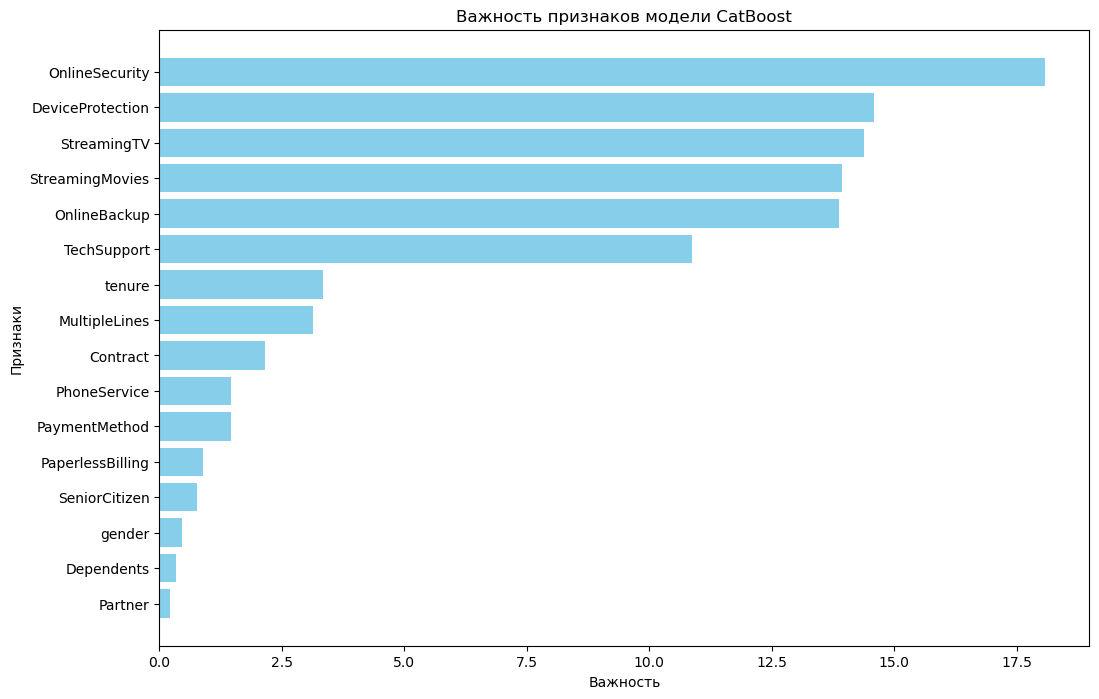

In [42]:
import matplotlib.pyplot as plt

importances_catboost = best_catboost.get_feature_importance()

feature_names = X_train_scaled.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances_catboost})

importance_df = importance_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Важность')
plt.ylabel('Признаки')
plt.title('Важность признаков модели CatBoost')
plt.show()

In [45]:
# Сохраняю обработанные данные в файл csv чтобы использовать их для деплоя модели
X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_test_scaled_df = pd.DataFrame(X_test_scaled)
y_train_df = pd.DataFrame(y_train, columns=['ideal_plan'])
y_test_df = pd.DataFrame(y_test, columns=['ideal_plan'])

train_data = pd.concat([X_train_scaled_df, y_train_df], axis=1)
test_data = pd.concat([X_test_scaled_df, y_test_df], axis=1)

full_data = pd.concat([train_data, test_data], axis=0)

full_data.to_csv('combined_data.csv', index=False)

print("Файл сохранён как 'combined_data.csv'")

Файл сохранён как 'combined_data.csv'
